In [1]:
%cd ..

C:\Users\ilyap\dev\python\python


In [2]:
from investments import moex
from investments import instruments
import numpy as np
import pandas as pd
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
%matplotlib notebook

In [4]:
sns.set()

In [5]:
usd=moex.FXInstrument("USD000UTSTOM")
eur=moex.FXInstrument("EUR_RUB__TOM")

In [14]:
usd_ohlc = usd.load_ohlc_table()
eur_ohlc = eur.load_ohlc_table()

2021-01-13 22:38:45,866 INFO investments.moex Loading USD000UTSTOM from beginning
2021-01-13 22:38:46,435 INFO investments.moex Skipping 2003-05-23 for USD000UTSTOM as it had no trades
2021-01-13 22:38:46,437 INFO investments.moex Skipping 2003-06-20 for USD000UTSTOM as it had no trades
2021-01-13 22:38:46,440 INFO investments.moex Skipping 2003-07-03 for USD000UTSTOM as it had no trades
2021-01-13 22:38:46,441 INFO investments.moex Skipping 2003-08-29 for USD000UTSTOM as it had no trades
2021-01-13 22:38:46,443 INFO investments.moex Loading USD000UTSTOM from 2003-09-06
2021-01-13 22:38:46,942 INFO investments.moex Skipping 2003-10-10 for USD000UTSTOM as it had no trades
2021-01-13 22:38:46,944 INFO investments.moex Skipping 2003-11-10 for USD000UTSTOM as it had no trades
2021-01-13 22:38:46,947 INFO investments.moex Skipping 2003-11-26 for USD000UTSTOM as it had no trades
2021-01-13 22:38:46,948 INFO investments.moex Skipping 2003-12-24 for USD000UTSTOM as it had no trades
2021-01-13 

2021-01-13 22:39:18,846 INFO investments.moex Loading EUR_RUB__TOM from 2017-11-14
2021-01-13 22:39:19,122 INFO investments.moex Loading EUR_RUB__TOM from 2018-04-10
2021-01-13 22:39:19,382 INFO investments.moex Loading EUR_RUB__TOM from 2018-08-29
2021-01-13 22:39:19,627 INFO investments.moex Loading EUR_RUB__TOM from 2019-01-22
2021-01-13 22:39:19,850 INFO investments.moex Loading EUR_RUB__TOM from 2019-06-15
2021-01-13 22:39:20,049 INFO investments.moex Loading EUR_RUB__TOM from 2019-11-02
2021-01-13 22:39:20,284 INFO investments.moex Loading EUR_RUB__TOM from 2020-04-01
2021-01-13 22:39:20,508 INFO investments.moex Loading EUR_RUB__TOM from 2020-08-26
2021-01-13 22:39:20,649 INFO investments.moex Loading EUR_RUB__TOM from 2021-01-13


In [33]:
usd.update_ohlc_table(usd_ohlc)
eur.update_ohlc_table(eur_ohlc)

2021-01-13 22:46:16,939 INFO investments.moex Loading USD000UTSTOM from 2021-01-13
2021-01-13 22:46:17,097 INFO investments.moex Loading EUR_RUB__TOM from 2021-01-13


In [16]:
df_usd=pd.DataFrame(usd_ohlc.ohlc_series)
df_usd=df_usd.set_index("date")
df_eur=pd.DataFrame(eur_ohlc.ohlc_series)
df_eur=df_eur.set_index("date")

In [17]:
df_usd.tail()

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2021-01-05,74.1125,75.2875,73.8500,74.0400,65551,2.012427e+11,74.6358
2021-01-06,73.7800,74.2075,73.3975,73.9225,58366,1.477447e+11,73.7675
2021-01-08,74.2650,74.8350,73.8175,74.1550,63278,1.738605e+11,74.2494
2021-01-11,74.4325,75.0000,74.2650,74.6600,70645,2.942960e+11,74.6261
2021-01-12,74.4600,74.4600,73.5000,73.5400,76982,2.591083e+11,74.0069


In [18]:
df_usd.describe()

,open,high,low,close,num_trades,volume,waprice
count,4418.000000,4418.000000,4418.000000,4418.000000,4418.000000,4.418000e+03,4418.000000
mean,41.721658,41.941520,41.510961,41.724723,17556.782707,1.362337e+11,41.726482
std,17.148518,17.341443,16.965092,17.146601,20743.043486,9.683996e+10,17.149970
min,23.110000,23.152500,23.057500,23.102500,31.000000,3.514546e+08,23.099600
25%,28.620000,28.650000,28.570000,28.622425,901.500000,6.175129e+10,28.612675
50%,31.361050,31.500000,31.243800,31.370000,11326.500000,1.280991e+11,31.367050
75%,60.435000,61.216250,60.081250,60.667500,27335.250000,1.900415e+11,60.745350
max,82.303000,85.999000,81.750000,82.630000,141492.000000,8.164174e+11,83.834400


In [19]:
df_eur.describe()

,open,high,low,close,num_trades,volume,waprice
count,3894.000000,3894.000000,3894.000000,3894.000000,3894.000000,3.894000e+03,3894.000000
mean,52.927153,53.212417,52.648149,52.923052,2907.865948,1.509861e+10,52.923492
std,17.232276,17.461834,17.024936,17.235226,3234.107465,1.244835e+10,17.236364
min,33.320100,33.345000,33.000000,33.330000,9.000000,2.053429e+07,33.331400
25%,39.032000,39.130025,38.941125,39.021250,437.500000,5.625219e+09,39.031625
50%,43.960000,44.100000,43.842500,43.946000,1271.500000,1.250237e+10,43.959350
75%,70.480625,70.824375,70.062500,70.453750,5164.750000,2.242852e+10,70.469650
max,93.615000,100.740000,92.952500,93.775000,23195.000000,1.061776e+11,93.722200


In [20]:
medians_usd=[(year,
  df_usd[date(year,12,20):date(year,12,31)]["close"].median(),
  df_usd[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2003,2020)]
medians_eur=[(year,
  df_eur[date(year,12,20):date(year,12,31)]["close"].median(),
  df_eur[date(year+1,1,10):date(year+1,1,20)]["close"].median()) 
 for year in range(2005,2020)]

In [32]:
df_medians_usd = pd.DataFrame(medians_usd, 
                              columns=["year", 
                                        "median at last days of year", 
                                        "median at first days of next year"]).set_index("year")
df_medians_eur = pd.DataFrame(medians_eur, 
                              columns=["year", 
                                        "median at last days of year", 
                                        "median at first days of next year"]).set_index("year")

In [22]:
df_medians_usd["increase"]=df_medians_usd["median at first days of next year"]/df_medians_usd["median at last days of year"]-1.0
df_medians_eur["increase"]=df_medians_eur["median at first days of next year"]/df_medians_eur["median at last days of year"]-1.0

In [23]:
df_medians_usd["buy in december?"] = df_medians_usd["increase"] > 0.05
df_medians_eur["buy in december?"] = df_medians_eur["increase"] > 0.05

In [24]:
df_medians_usd

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2003,29.24500,28.8750,-0.012652,False
2004,27.83375,28.0062,0.006196,False
2005,28.80000,28.3400,-0.015972,False
2006,26.34000,26.5625,0.008447,False
2007,24.71000,24.3630,-0.014043,False
2008,28.68375,32.0400,0.117009,True
2009,30.13000,29.5640,-0.018785,False
2010,30.57000,30.0050,-0.018482,False
2011,31.72000,31.5600,-0.005044,False


In [18]:
df_medians_eur

,median at last days of year,median at first days of next year,increase,buy in december?
year,,,,
2005,34.18250,34.37000,0.005485,False
2006,34.65750,34.37000,-0.008295,False
2007,35.61500,36.04000,0.011933,False
2008,40.17625,42.08875,0.047603,False
2009,43.24875,42.58300,-0.015394,False
2010,40.08000,39.97000,-0.002745,False
2011,41.20000,40.38000,-0.019903,False
2012,40.41000,40.35000,-0.001485,False
2013,44.78500,45.47800,0.015474,False


In [25]:
df_usd

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2003-04-15,31.1850,31.1975,31.1850,31.1970,55,1.132583e+09,31.1912
2003-04-16,31.1950,31.1950,31.1850,31.1885,65,7.289744e+08,31.1901
2003-04-17,31.1800,31.2000,31.1700,31.1975,63,1.879374e+09,31.1872
2003-04-18,31.1975,31.1975,31.1800,31.1801,51,1.053497e+09,31.1824
2003-04-21,31.1065,31.1100,31.1000,31.1025,47,5.165712e+08,31.1019
...,...,...,...,...,...,...,...
2021-01-05,74.1125,75.2875,73.8500,74.0400,65551,2.012427e+11,74.6358
2021-01-06,73.7800,74.2075,73.3975,73.9225,58366,1.477447e+11,73.7675
2021-01-08,74.2650,74.8350,73.8175,74.1550,63278,1.738605e+11,74.2494


In [20]:
df_eur

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2005-06-20,34.790,34.8300,34.7701,34.8100,21,1.572245e+08,34.8073
2005-06-21,34.665,34.6750,34.5775,34.5850,29,1.642754e+08,34.6353
2005-06-22,34.780,34.8150,34.7200,34.7200,23,1.136216e+08,34.7679
2005-06-23,34.680,34.6800,34.6000,34.6200,25,1.909008e+08,34.6316
2005-06-24,34.520,34.6200,34.5200,34.5600,24,7.324768e+07,34.5671
...,...,...,...,...,...,...,...
2020-12-24,91.600,91.7375,89.9600,90.0950,8978,3.996634e+10,90.8619
2020-12-25,90.095,90.6675,89.7700,90.5650,10352,4.883437e+10,90.0382
2020-12-28,90.560,90.6800,89.8450,90.0550,9023,4.837377e+10,90.0865


In [21]:
plt.style.use('seaborn-whitegrid')

In [26]:
df_eur["close"].rolling(window=10).mean()

date
2005-06-20         NaN
2005-06-21         NaN
2005-06-22         NaN
2005-06-23         NaN
2005-06-24         NaN
                ...   
2021-01-05    91.01075
2021-01-06    90.96750
2021-01-08    90.80525
2021-01-11    90.73650
2021-01-12    90.70600
Name: close, Length: 3894, dtype: float64

<IPython.core.display.Javascript object>


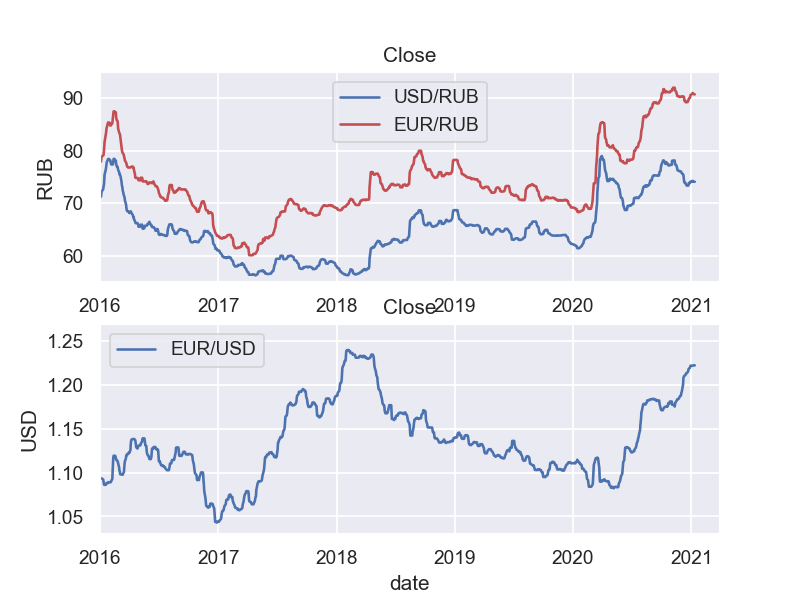

In [28]:
fig, ax = plt.subplots(2)
ax[0].plot(df_usd.index, df_usd["close"].rolling(window=10).median(),'b',label='USD/RUB')
ax[0].plot(df_eur.index, df_eur["close"].rolling(window=10).median(),'r',label='EUR/RUB')
ax[0].set(xlim=(date(2016,1,1),date(2021,3,31)), ylim=(55,95), xlabel='date', ylabel='RUB', title='Close')
leg=ax[0].legend()
ax[1].plot(df_usd.index, (df_eur["close"]/df_usd["close"]).rolling(window=10).median(),'b',label='EUR/USD')
ax[1].set(xlim=(date(2016,1,1),date(2021,3,31)), ylim=(1.03,1.27), xlabel='date', ylabel='USD', title='Close')
ax[1].legend()

In [31]:
q=usd.load_intraday_quotes()
q

IntradayQuote(instrument='USD000UTSTOM', last=73.6675, num_trades=62273, is_trading=True, time=datetime.time(22, 29))

In [53]:
merged=pd.concat([df_eur, df_usd], axis='columns', keys=["EUR","USD"], sort=True, verify_integrity=True)

In [62]:
merged

EUR                                                      \
               open     high      low    close num_trades        volume   
2003-04-15      NaN      NaN      NaN      NaN        NaN           NaN   
2003-04-16      NaN      NaN      NaN      NaN        NaN           NaN   
2003-04-17      NaN      NaN      NaN      NaN        NaN           NaN   
2003-04-18      NaN      NaN      NaN      NaN        NaN           NaN   
2003-04-21      NaN      NaN      NaN      NaN        NaN           NaN   
...             ...      ...      ...      ...        ...           ...   
2021-01-05  90.8475  92.3425  90.8475  91.0025     7819.0  1.904461e+10   
2021-01-06  91.0000  91.3525  90.5850  91.0975     5587.0  1.349711e+10   
2021-01-08  90.9375  91.4775  90.6000  90.6000     6267.0  1.602933e+10   
2021-01-11  90.6975  91.1150  90.5000  90.8000     8644.0  4.144779e+10   
2021-01-12  90.4400  90.5325  89.4500  89.7900    10546.0  3.156679e+10   

                         USD                                        \
            waprice     open     high      low    close num_trades   
2003-04-15      NaN  31.1850  31.1975  31.1850  31.1970         55   
2003-04-16      NaN  31.1950  31.1950  31.1850  31.1885         65   
2003-04-17      NaN  31.1800  31.2000  31.1700  31.1975         63   
2003-04-18      NaN  31.1975  31.1975  31.1800  31.1801         51   
2003-04-21      NaN  31.1065  31.1100  31.1000  31.1025         47   
...             ...      ...      ...      ...      ...        ...   
2021-01-05  91.6964  74.1125  75.2875  73.8500  74.0400      65551   
2021-01-06  90.8994  73.7800  74.2075  73.3975  73.9225      58366   
2021-01-08  90.8765  74.2650  74.8350  73.8175  74.1550      63278   
2021-01-11  90.8031  74.4325  75.0000  74.2650  74.6600      70645   
2021-01-12  90.0200  74.4600  74.4600  73.5000  73.5400      76982   

                                   
                  volume  waprice  
2003-04-15  1.132583e+09  31.1912  
2003-04-16  7.289744e+08  31.1901  
2003-04-17  1.879374e+09  31.1872  
2003-04-18  1.053497e+09  31.1824  
2003-04-21  5.165712e+08  31.1019  
...                  ...      ...  
2021-01-05  2.012427e+11  74.6358  
2021-01-06  1.477447e+11  73.7675  
2021-01-08  1.738605e+11  74.2494  
2021-01-11  2.942960e+11  74.6261  
2021-01-12  2.591083e+11  74.0069  

[4418 rows x 14 columns]

In [65]:
(merged["EUR"]["close"]/merged["USD"]["close"]).dropna()

2005-06-20    1.220547
2005-06-21    1.208847
2005-06-22    1.213990
2005-06-23    1.207323
2005-06-24    1.206392
                ...   
2021-01-05    1.229099
2021-01-06    1.232338
2021-01-08    1.221765
2021-01-11    1.216180
2021-01-12    1.220968
Name: close, Length: 3894, dtype: float64

In [60]:
merged["EUR"][merged["EUR"]["open"].isna()]

,open,high,low,close,num_trades,volume,waprice
2003-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2005-06-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
pd.concat?

In [61]:
df_eur.head()

,open,high,low,close,num_trades,volume,waprice
date,,,,,,,
2005-06-20,34.790,34.830,34.7701,34.810,21,157224489.9,34.8073
2005-06-21,34.665,34.675,34.5775,34.585,29,164275431.2,34.6353
2005-06-22,34.780,34.815,34.7200,34.720,23,113621579.7,34.7679
2005-06-23,34.680,34.680,34.6000,34.620,25,190900784.3,34.6316
2005-06-24,34.520,34.620,34.5200,34.560,24,73247680.0,34.5671


In [66]:
moex.ShareInstrument("SBMX").load_intraday_quotes()

IntradayQuote(instrument='SBMX', last=1694.5, num_trades=734, is_trading=False, time=datetime.time(18, 44, 42))